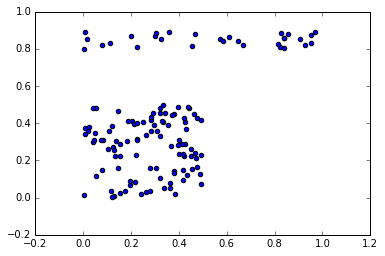

[28.668173888245587, 29.153750303677032, 22.436066497956975, 49.742009310120416]
[52.371063650728075, 32.485124049620566, 24.341749373546754, 20.802062926104593]
[56.898736587369363, 36.39168215412456, 27.07365219427491, 9.6359290642311333]
[58.243833906974935, 38.570599193625654, 28.512552746560562, 4.6730141528389026]
[58.452296085964718, 39.90318561151674, 29.325969303536702, 2.3185489989818548]
[58.186658133871944, 40.813029052776209, 29.835330077259936, 1.1649827360919076]
[57.734163023619324, 41.491858888303867, 30.184139104890473, 0.58983898318637284]
[57.223262108696055, 42.034353884090145, 30.44224592367928, 0.30013808353449123]
[56.711063658982589, 42.490069077974603, 30.645598616996715, 0.15326864604611393]
[56.221795782479973, 42.886208980081172, 30.813514883937611, 0.078480353501236777]
[0.33414351412032867, 0.3390776460961869, 0.33789512970730134, 0.33789197485237332] [0.40223841712696684, 0.4078429130966979, 0.40655237050101117, 0.4063429665966069]


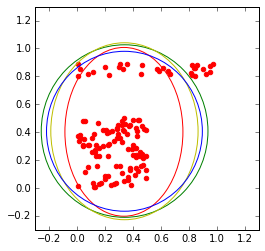

0.845923751868 1.19517396572 1.05573257002 1.11715721002
1.20988756321 1.23690409277 1.26846754286 1.14637049563
0.0656194807278 nan nan nan


In [48]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math

#data1=[]
#for i in range(100):
#	data1=data1+[[0.5+0.5*random.random(),0.5+0.5*random.random()]]
	
data2=[]
for i in range(100):
	data2=data2+[[0.5*random.random(),0.5*random.random()]]

data3 =[]
for i in range(30):
	data3=data3+[[random.random(),0.8+0.1*random.random()]]

data=data2+data3#+data1



datax=[]
for i in range(len(data)):
	datax=datax+[data[i][0]]
	
datay=[]
for i in range(len(data)):
	datay=datay+[data[i][1]]

plt.scatter(datax,datay)
plt.show()


	
assignx = []
assigny = []

for k in range(4):
	assignx=assignx+[random.random()]

for k in range(4):
	assigny=assigny+[random.random()]



sum=[]
for i in range(len(data)):
	sum=sum+[[]]
r=[]	
for i in range(4):
	r=r+[[]]
	for j in range(len(data)):
		r[i]=r[i]+[[]]
update_assignx=[[],[],[],[]]
update_assigny=[[],[],[],[]]




vx=[random.random(),random.random(),random.random(),random.random()]
vy=[random.random(),random.random(),random.random(),random.random()]

p=[random.random(),random.random(),random.random(),random.random()]
rsum=[[],[],[],[]]
turn = 0
while turn<10:
	turn = turn+1
	sum=[]
	for n in range(len(data)):
		sum=sum+[[]]
	for n in range(len(data)):
		s=0
		for k in range(4):
			s=s+p[k]/(2*np.pi*np.sqrt(vx[k]*vy[k]))*np.exp(-(assignx[k]-datax[n])**2/(2*vx[k])-(assigny[k]-datay[n])**2/(2*vy[k]))
		sum[n]=s
		for k in range(4):
			r[k][n]=p[k]/(2*np.pi*np.sqrt(vx[k]*vy[k]))*np.exp(-(assignx[k]-datax[n])**2/(2*vx[k])-(assigny[k]-datay[n])**2/(2*vy[k]))/s
			#print a,j,n,r[j][n]

	for k in range(4):
		rs=0
		for n in range(len(data)):
			rs=rs+r[k][n]
		rsum[k]=rs
			
	for k in range(4):
		ua=[0,0]
		for n in range(len(data)):
			ua[0]=ua[0]+r[k][n]*datax[n]/float(rsum[k])
			ua[1]=ua[1]+r[k][n]*datay[n]/float(rsum[k])
			update_assignx[k]=ua[0]
			update_assigny[k]=ua[1]
			
			
	assignx= update_assignx
	assigny= update_assigny

	for k in range(4):
		for n in range(len(data)):
			vx[k]=vx[k]+r[k][n]*(datax[n]-assignx[k])**2/float(rsum[k])
			vy[k]=vy[k]+r[k][n]*(datay[n]-assigny[k])**2/float(rsum[k])
		
	print rsum
	rsumsum=0
	for k in range(4):
		rsumsum=rsumsum+rsum[k]
	
	p[k]=rsum[k]/float(rsumsum)	

print assignx, assigny

c=[[],[],[],[]]

for n in range(len(data)):
	a=[]
	for k in range(4):
		a=a+[r[k][n]]
	i=a.index(max(a))
	c[i]=c[i]+[data[n]]

ell0= Ellipse(xy=[assignx[0],assigny[0]],width=np.sqrt(vx[0]),height=np.sqrt(vy[0]),color='r',fill=False)
ell1= Ellipse(xy=[assignx[1],assigny[1]],width=np.sqrt(vx[1]),height=np.sqrt(vy[1]),color='g',fill=False)
ell2= Ellipse(xy=[assignx[2],assigny[2]],width=np.sqrt(vx[2]),height=np.sqrt(vy[2]),color='y',fill=False)
ell3= Ellipse(xy=[assignx[3],assigny[3]],width=np.sqrt(vx[3]),height=np.sqrt(vy[3]),color='b',fill=False)

fig=plt.figure(0) 
ax=fig.add_subplot(111, aspect='equal')
plt.xlim([-0.3,1.3])
plt.ylim([-0.3,1.3])
ax.add_artist(ell0)
ax.add_artist(ell1)
ax.add_artist(ell2)
ax.add_artist(ell3)

ax.scatter([x for x,y in c[0]],[y for x,y in c[0]],color='r')
ax.scatter([x for x,y in c[1]],[y for x,y in c[1]],color='g')
ax.scatter([x for x,y in c[2]],[y for x,y in c[2]],color='y')
ax.scatter([x for x,y in c[3]],[y for x,y in c[3]],color='b')


plt.show()

print np.sqrt(vx[0]),np.sqrt(vx[1]),np.sqrt(vx[2]),np.sqrt(vx[3])
print np.sqrt(vy[0]),np.sqrt(vy[1]),np.sqrt(vy[2]),np.sqrt(vy[3])

print np.var(c[0]),np.var(c[1]),np.var(c[2]),np.var(c[3])

	


	

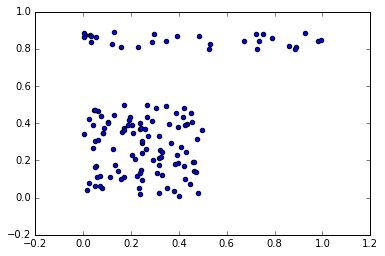

[0.24515850963806382, 0.28094428317479908, 0.24090778259226128, 0.23808251241923564] [0.27376196392475233, 0.29030375085463966, 0.2697758218300319, 0.26951725325052128]
[0.29195305552926654, 0.34314091380263229, 0.28601377712023995, 0.28239621568403672] [0.34714920267870852, 0.3728213861862768, 0.34166236028503799, 0.34108894310853705]


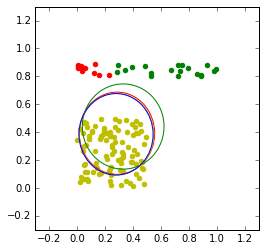

([0.28457583577179552,
  0.32882035884505334,
  0.28067530891499382,
  0.27765462770270349],
 [0.39216276190895083,
  0.44034972785260401,
  0.38528184268398075,
  0.38449927923472843])

In [55]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math

#data1=[]
#for i in range(100):
#	data1=data1+[[0.5+0.5*random.random(),0.5+0.5*random.random()]]
	
data2=[]
for i in range(100):
	data2=data2+[[0.5*random.random(),0.5*random.random()]]

data3 =[]
for i in range(30):
	data3=data3+[[random.random(),0.8+0.1*random.random()]]

data=data2+data3#+data1



datax=[]
for i in range(len(data)):
	datax=datax+[data[i][0]]
	
datay=[]
for i in range(len(data)):
	datay=datay+[data[i][1]]

plt.scatter(datax,datay)
plt.show()


	
assignx = []
assigny = []

for k in range(4):
	assignx=assignx+[random.random()]

for k in range(4):
	assigny=assigny+[random.random()]



sum=[[],[],[],[]]
r=[]	
for i in range(4):
	r=r+[[]]
	for j in range(len(data)):
		r[i]=r[i]+[[]]
update_assignx=[[],[],[],[]]
update_assigny=[[],[],[],[]]



vx, vy = [0.2,0.2,0.2,0.2], [0.2,0.2,0.2,0.2]
p=[0.5,0.5,0.5,0.5]


rsum=[[],[],[],[]]


turns = 0
while turns < 2:
	sum=[]
	for n in range(len(data)):
		sum=sum+[[]]
	for n in range(len(data)):
		s=0
		for k in range(4):
			s=s+p[k]/(2*np.pi*np.sqrt(vx[k]*vy[k]))*np.exp(-(assignx[k]-datax[n])**2/(2*vx[k])-(assigny[k]-datay[n])**2/(2*vy[k]))
			sum[n]=s
		for k in range(4):
			r[k][n]=p[k]/(2*np.pi*np.sqrt(vx[k]*vy[k]))*np.exp(-(assignx[k]-datax[n])**2/(2*vx[k])-(assigny[k]-datay[n])**2/(2*vy[k]))/s
			#print a,j,n,r[j][n]
	for k in range(4):
		rs=0
		for n in range(len(data)):
			rs=rs+r[k][n]
		rsum[k]=rs
			
		ua=[0,0]

		for n in range(len(data)):
			ua[0]=ua[0]+r[k][n]*datax[n]/float(rsum[k])
			ua[1]=ua[1]+r[k][n]*datay[n]/float(rsum[k])
		update_assignx[k]=ua[0]
		update_assigny[k]=ua[1]
			
			
	assignx= update_assignx
	assigny= update_assigny
	for n in range(len(data)):
		for k in range(4):
			vx[k]=vx[k]+r[k][n]*(datax[n]-assignx[k])**2/float(rsum[k])
			vy[k]=vy[k]+r[k][n]*(datay[n]-assigny[k])**2/float(rsum[k])
	print vx, vy
	rsumsum=0
	for k in range(4):
		rsumsum=rsumsum+rsum[k]
	
	p[k]=rsum[k]/float(rsumsum)	
	turns += 1

c=[[],[],[],[]]

for n in range(len(data)):
	a=[]
	for k in range(4):
		a=a+[r[k][n]]
	i=a.index(max(a))
	c[i]=c[i]+[data[n]]

ell0= Ellipse(xy=[assignx[0],assigny[0]],width=np.sqrt(vx[0]),height=np.sqrt(vy[0]),color='r',fill=False)
ell1= Ellipse(xy=[assignx[1],assigny[1]],width=np.sqrt(vx[1]),height=np.sqrt(vy[1]),color='g',fill=False)
ell2= Ellipse(xy=[assignx[2],assigny[2]],width=np.sqrt(vx[2]),height=np.sqrt(vy[2]),color='y',fill=False)
ell3= Ellipse(xy=[assignx[3],assigny[3]],width=np.sqrt(vx[3]),height=np.sqrt(vy[3]),color='b',fill=False)

fig=plt.figure(0) 
ax=fig.add_subplot(111, aspect='equal')
plt.xlim([-0.3,1.3])
plt.ylim([-0.3,1.3])
ax.add_artist(ell0)
ax.add_artist(ell1)
ax.add_artist(ell2)
ax.add_artist(ell3)

ax.scatter([x for x,y in c[0]],[y for x,y in c[0]],color='r')
ax.scatter([x for x,y in c[1]],[y for x,y in c[1]],color='g')
ax.scatter([x for x,y in c[2]],[y for x,y in c[2]],color='y')
ax.scatter([x for x,y in c[3]],[y for x,y in c[3]],color='b')


plt.show()

assignx, assigny
	

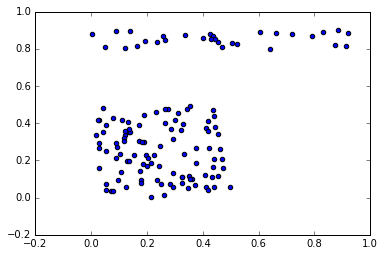

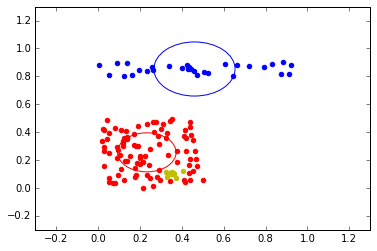

0.139921176255 1.24530980146e-18 0.0213742392864 0.193865410692
0.0196430728767 nan 0.0164244457753 0.0764079532757


In [11]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

data2=[]
for i in range(100):
	data2=data2+[[0.5*random.random(),0.5*random.random()]]

data3 =[]
for i in range(30):
	data3=data3+[[random.random(),0.8+0.1*random.random()]]

data=data2+data3#+data1



datax=[]
for i in range(len(data)):
	datax=datax+[data[i][0]]
	
datay=[]
for i in range(len(data)):
	datay=datay+[data[i][1]]

plt.scatter(datax,datay)
plt.show()


	
assign = []
for j in range(4):
	assign=assign+[[random.random(),random.random()]]




sum=[]
for i in range(len(data)):
	sum=sum+[[]]
r=[]	
for i in range(4):
	r=r+[[]]
	for j in range(len(data)):
		r[i]=r[i]+[[]]
update_assign=[]
for k in range(4):
	update_assign=update_assign+[[]]	

I = 2 # dimension

v=[] # variance or 1/beta	
for k in range(4):
	v=v+[np.var(data)]

p=[]
for k in range(4):
	p=p+[1]
rsum=[[],[],[],[]]
shrink = False
while not shrink:
	sum=[]
	for n in range(len(data)):
		sum=sum+[[]]
	for n in range(len(data)):
		s=0
		for k in range(4):
			s=s+p[k]/(np.sqrt(2*np.pi*v[k]))**I*np.exp(-1/v[k]*(LA.norm(np.array(assign[k])-np.array(data[n]))))
			sum[n]=s
		for k in range(4):
			r[k][n]=p[k]/(np.sqrt(2*np.pi*v[k]))**I*np.exp(-1/v[k]*(LA.norm(np.array(assign[k])-np.array(data[n]))))/s
			#print a,j,n,r[j][n]

	for k in range(4):
		rs=0
		for n in range(len(data)):
			rs=rs+r[k][n]
			rsum[k]=rs
			

		ua=[0,0]
		for n in range(len(data)):
			ua[0]=ua[0]+r[k][n]*data[n][0]/float(rsum[k])
			ua[1]=ua[1]+r[k][n]*data[n][1]/float(rsum[k])
			update_assign[k]=ua
			
	assign= update_assign
	v=[0,0,0,0]
	for k in range(4):
		for n in range(len(data)):
			v[k]=v[k]+r[k][n]*LA.norm(np.array(data[n])-np.array(assign[k]))**2/float(I*rsum[k])
		if v[k] < 0.00000001:
			shrink = True
	rsumsum=0
	for k in range(4):
		rsumsum=rsumsum+rsum[k]
	
	p[k]=rsum[k]/float(rsumsum)	


c=[[],[],[],[]]
for n in range(len(data)):
	a=[]
	for k in range(4):
		a=a+[r[k][n]]
	i=a.index(max(a))
	c[i]=c[i]+[data[n]]


circle0= plt.Circle(assign[0],np.sqrt(v[0]),color='r',fill=False)
circle1= plt.Circle(assign[1],np.sqrt(v[1]),color='g',fill=False)
circle2= plt.Circle(assign[2],np.sqrt(v[2]),color='y',fill=False)
circle3= plt.Circle(assign[3],np.sqrt(v[3]),color='b',fill=False)

fig, ax=plt.subplots()
plt.xlim([-.3,1.3])
plt.ylim([-.3,1.3])
ax.add_artist(circle0)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

ax.scatter([x for x,y in c[0]],[y for x,y in c[0]],color='r')
ax.scatter([x for x,y in c[1]],[y for x,y in c[1]],color='g')
ax.scatter([x for x,y in c[2]],[y for x,y in c[2]],color='y')
ax.scatter([x for x,y in c[3]],[y for x,y in c[3]],color='b')


plt.show()

print np.sqrt(v[0]),np.sqrt(v[1]),np.sqrt(v[2]),np.sqrt(v[3])
print np.var(c[0]),np.var(c[1]),np.var(c[2]),np.var(c[3])

	


	

In [17]:
np.sqrt(0.5)

0.70710678118654757